In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Import Dataset**

In [3]:
Data_mining = '/content/drive/MyDrive/Dataset/Data mining.csv'

Data_mining = pd.read_csv(Data_mining, header=None, sep=',')

Data_mining = Data_mining.iloc[1:]

Data_mining.reset_index(drop=True, inplace=True)

In [4]:
Data_mining= Data_mining.loc[:,1:]

In [5]:
Data_mining.head()

,1,2,3,4,5,6,7,8,9,10,11
0,1,2,1,11,39,1,5,1,1,1997,19
1,2,2,1,11,39,1,5,1,1,1997,19
2,3,2,1,11,39,1,5,1,1,1997,19
3,4,2,1,11,39,1,5,1,1,1997,19
4,5,2,1,11,39,1,5,1,1,1997,19


In [6]:
col_names = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
             'v9', 'v10', 'v11']

Data_mining.columns = col_names

Data_mining.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11'], dtype='object')

In [7]:
Data_mining.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,1,2,1,11,39,1,5,1,1,1997,19
1,2,2,1,11,39,1,5,1,1,1997,19
2,3,2,1,11,39,1,5,1,1,1997,19
3,4,2,1,11,39,1,5,1,1,1997,19
4,5,2,1,11,39,1,5,1,1,1997,19


In [8]:
Data_mining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86265 entries, 0 to 86264
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      86265 non-null  object
 1   v2      86265 non-null  object
 2   v3      86265 non-null  object
 3   v4      86265 non-null  object
 4   v5      86265 non-null  object
 5   v6      86265 non-null  object
 6   v7      86265 non-null  object
 7   v8      86265 non-null  object
 8   v9      75882 non-null  object
 9   v10     86210 non-null  object
 10  v11     86210 non-null  object
dtypes: object(11)
memory usage: 7.2+ MB


In [9]:
Data_mining['v5'] = pd.to_numeric(Data_mining['v5'], errors='coerce')

In [10]:
Data_mining['v10'] = pd.to_numeric(Data_mining['v10'], errors='coerce')

In [11]:
Data_mining['v11'] = pd.to_numeric(Data_mining['v11'], errors='coerce')

In [12]:
Data_mining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86265 entries, 0 to 86264
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      86265 non-null  object 
 1   v2      86265 non-null  object 
 2   v3      86265 non-null  object 
 3   v4      86265 non-null  object 
 4   v5      86265 non-null  int64  
 5   v6      86265 non-null  object 
 6   v7      86265 non-null  object 
 7   v8      86265 non-null  object 
 8   v9      75882 non-null  object 
 9   v10     86210 non-null  float64
 10  v11     86210 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 7.2+ MB


#**Eksplorasi Data**

In [13]:
Data_mining.shape

(86265, 11)

In [14]:
Data_mining.describe()

,v5,v10,v11
count,86265.000000,86210.000000,86210.000000
mean,38.073889,1998.718084,19.634776
std,7.265815,8.294207,4.280615
min,15.000000,1977.000000,10.000000
25%,33.000000,1992.000000,17.000000
50%,39.000000,1999.000000,19.000000
75%,44.000000,2005.000000,22.000000
max,49.000000,2017.000000,46.000000


#**Eksplorasi data ketegorik**

In [15]:
#mengidentifikasi tipe data veriabel

categorical = [var for var in Data_mining.columns if Data_mining[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['v1', 'v2', 'v3', 'v4', 'v6', 'v7', 'v8', 'v9']


In [16]:
Data_mining[categorical].head()

,v1,v2,v3,v4,v6,v7,v8,v9
0,1,2,1,11,1,5,1,1
1,2,2,1,11,1,5,1,1
2,3,2,1,11,1,5,1,1
3,4,2,1,11,1,5,1,1
4,5,2,1,11,1,5,1,1


*   Terdapat 8 variabel yang memiliki tipe data kategorik
*   Terdiri dari variaebl v1, v2, v3, v4, v6, v7, v8, dan v9
*   v9 merupakan veriabel target atau y




**Menangani data hilang**

In [17]:
Data_mining[categorical].isnull().sum()

v1        0
v2        0
v3        0
v4        0
v6        0
v7        0
v8        0
v9    10383
dtype: int64

In [18]:
missing_values_count=Data_mining.isnull().sum()
missing_values_count

v1         0
v2         0
v3         0
v4         0
v5         0
v6         0
v7         0
v8         0
v9     10383
v10       55
v11       55
dtype: int64

<Axes: >

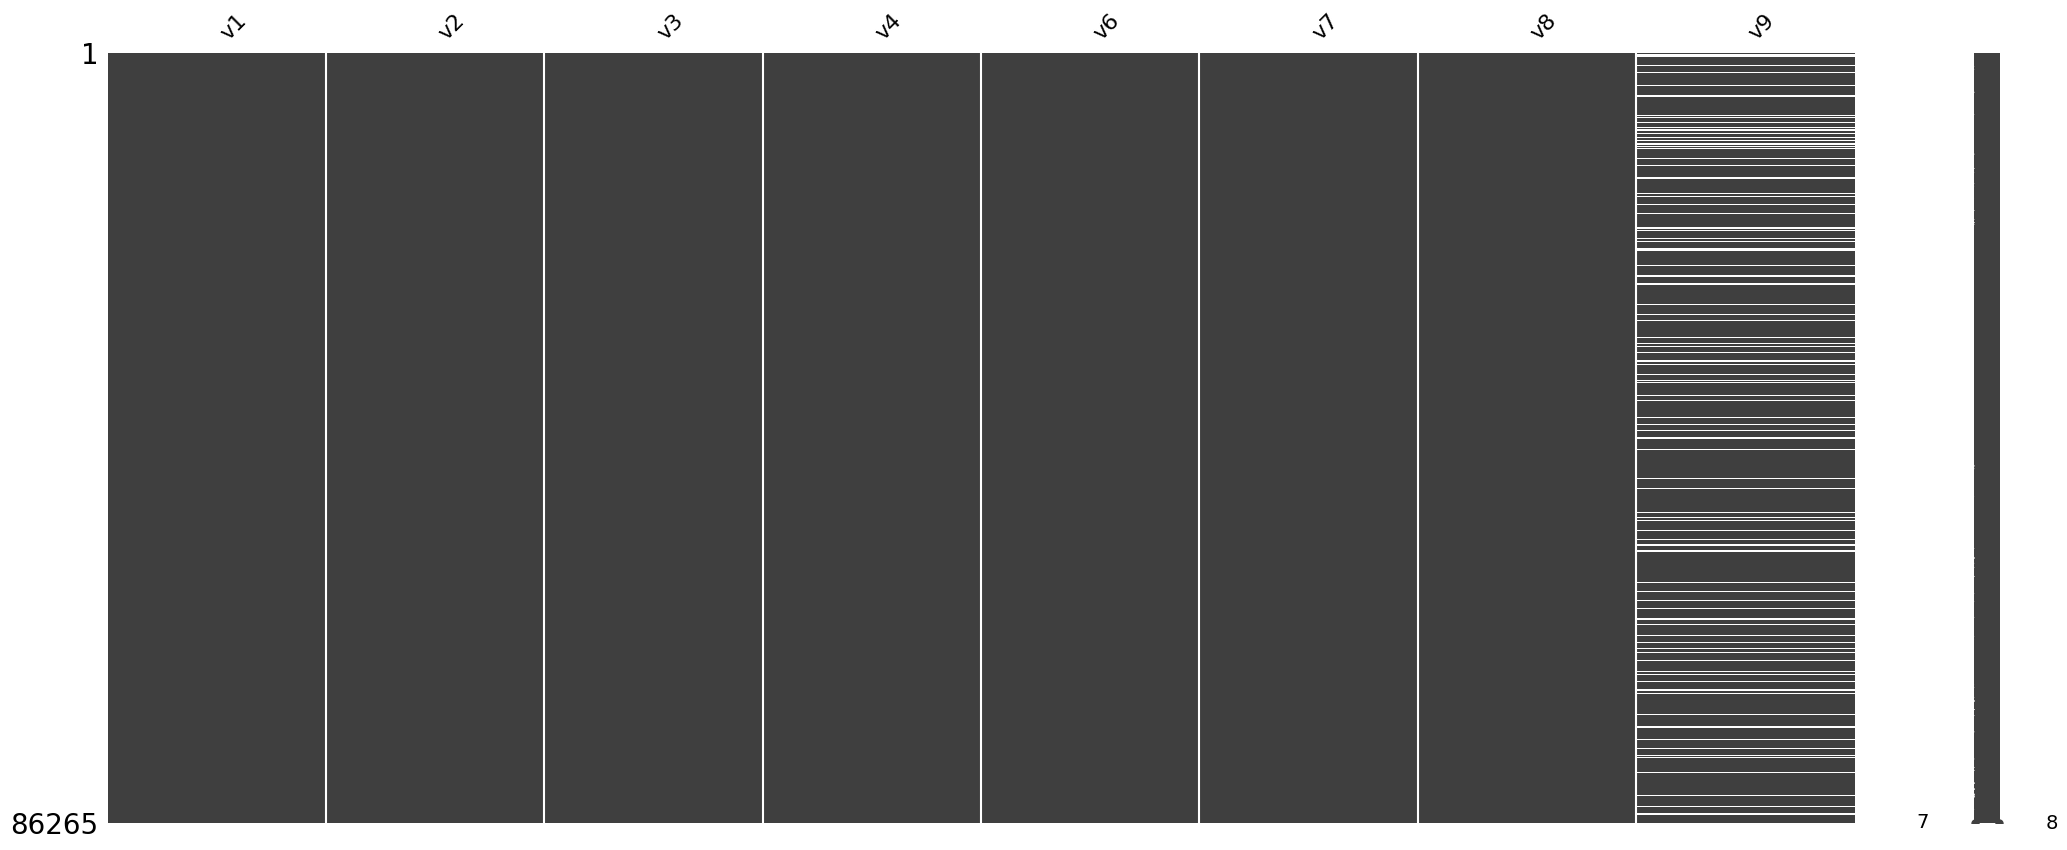

In [19]:
import missingno as msno
msno.matrix(Data_mining[categorical])

In [20]:
# banyak total missing value
total_cells = np.product(Data_mining.shape)
total_missing = missing_values_count.sum()

# persentase data missing
(total_missing/total_cells) * 100

1.1057892435044234

Data hilang dengan tipe MAR
Jumlah data hilang tidak lebih dari 2%-3% dari jumlah objek data

In [21]:
Data_mining['v9'].mode()

0    1
Name: v9, dtype: object

In [22]:
#imputasi data dengan modus
Data_mining['v9']=Data_mining['v9'].fillna('1')
print(Data_mining)


      v1  v2    v3  v4  v5 v6 v7 v8   v9     v10   v11
0      1   2     1  11  39  1  5  1    1  1997.0  19.0
1      2   2     1  11  39  1  5  1    1  1997.0  19.0
2      3   2     1  11  39  1  5  1    1  1997.0  19.0
3      4   2     1  11  39  1  5  1    1  1997.0  19.0
4      5   2     1  11  39  1  5  1    1  1997.0  19.0
...   ..  ..   ...  ..  .. .. .. ..  ...     ...   ...
86260  1  23  1970  94  44  2  2  0  1.0  1992.0  19.0
86261  2  23  1970  94  44  2  2  0  1.0  1992.0  19.0
86262  1  24  1970  94  22  2  0  1  1.0  2013.0  18.0
86263  1  25  1970  94  25  2  1  1  1.0  2007.0  15.0
86264  2  25  1970  94  25  2  1  1  1.0  2007.0  15.0

[86265 rows x 11 columns]


In [23]:
Data_mining.isnull().sum()

v1      0
v2      0
v3      0
v4      0
v5      0
v6      0
v7      0
v8      0
v9      0
v10    55
v11    55
dtype: int64

In [24]:
Data_mining= Data_mining.reset_index(drop= True)

In [25]:
#memeriksa jumlah kategori pada setiap variabel kategorik
for var in categorical:

    print(Data_mining[var].value_counts())

1     27013
2     19980
3     10327
1      7186
2      5563
4      4535
3      3610
4      2086
5      1944
5      1116
6       890
6       599
7       439
7       311
8       234
8       148
9       101
9        60
10       45
10       27
11       19
11       15
12        8
12        6
13        2
13        1
Name: v1, dtype: int64
4     2798
2     2733
5     2721
3     2717
9     2704
7     2694
8     2687
12    2674
6     2653
13    2648
17    2648
11    2627
10    2620
1     2611
18    2606
16    2582
19    2574
20    2571
21    2563
23    2559
14    2554
15    2545
22    2519
24    2508
25    2403
13     924
6      913
15     908
14     877
2      876
11     872
12     868
3      867
5      865
10     865
19     863
18     825
17     823
23     815
8      814
20     806
9      802
7      794
16     793
4      790
24     790
1      789
22     764
21     721
25     700
26      12
26       6
27       3
28       1
Name: v2, dtype: int64
1334    122
1810    119
1883    110
1867    108


In [26]:
Data_mining['v9'].value_counts()

1      46979
2      11279
1.0    11007
8       6349
2.0     4166
3       2872
8.0     2577
3.0      715
9        200
9.0      121
Name: v9, dtype: int64

In [27]:
Data_mining.isnull().sum()

v1      0
v2      0
v3      0
v4      0
v5      0
v6      0
v7      0
v8      0
v9      0
v10    55
v11    55
dtype: int64

**Cleaning Data**

In [28]:
print(Data_mining[categorical])

      v1  v2    v3  v4 v6 v7 v8   v9
0      1   2     1  11  1  5  1    1
1      2   2     1  11  1  5  1    1
2      3   2     1  11  1  5  1    1
3      4   2     1  11  1  5  1    1
4      5   2     1  11  1  5  1    1
...   ..  ..   ...  .. .. .. ..  ...
86260  1  23  1970  94  2  2  0  1.0
86261  2  23  1970  94  2  2  0  1.0
86262  1  24  1970  94  2  0  1  1.0
86263  1  25  1970  94  2  1  1  1.0
86264  2  25  1970  94  2  1  1  1.0

[86265 rows x 8 columns]


In [29]:
Data_mining['v1'] = Data_mining['v1'].astype(str)


In [30]:
Data_mining['v1'] = Data_mining['v1'].astype(object)

In [31]:
Data_mining['v2'] = Data_mining['v2'].astype(str)

In [32]:
Data_mining['v2'] = Data_mining['v2'].astype(object)

In [33]:
Data_mining['v3'] = Data_mining['v3'].astype(str)

In [34]:
Data_mining['v3'] = Data_mining['v3'].astype(object)

In [35]:
Data_mining['v4'] = Data_mining['v4'].astype(str)

In [36]:
Data_mining['v4'] = Data_mining['v4'].astype(object)

In [37]:
Data_mining['v7'] = Data_mining['v7'].astype(str)

In [38]:
Data_mining['v7'] = Data_mining['v7'].astype(object)

In [39]:
Data_mining['v8'] = Data_mining['v8'].astype(str)

In [40]:
Data_mining['v8'] = Data_mining['v8'].astype(object)

In [41]:
Data_mining['v9'] = Data_mining['v9'].astype(str)

In [42]:
Data_mining['v6'] = Data_mining['v6'].astype(str)


In [43]:
Data_mining['v6'] = Data_mining['v6'].astype(object)


In [44]:
Data_mining['v6'].value_counts()

2    41244
1    32683
3     9426
0     2912
Name: v6, dtype: int64

In [45]:
Data_mining['v9'].value_counts()

1      46979
2      11279
1.0    11007
8       6349
2.0     4166
3       2872
8.0     2577
3.0      715
9        200
9.0      121
Name: v9, dtype: int64

In [46]:
Data_mining['v9'] = Data_mining['v9'].replace('1.0', '1')

In [47]:
Data_mining['v9'] = Data_mining['v9'].replace('2.0', '2')

In [48]:
Data_mining['v9'] = Data_mining['v9'].replace('3.0', '3')

In [49]:
Data_mining['v9'] = Data_mining['v9'].replace('8.0', '8')

In [50]:
Data_mining['v9'] = Data_mining['v9'].replace('9.0', '9')

In [51]:
Data_mining['v9'] = Data_mining['v9'].astype(object)

In [52]:
print(Data_mining['v9'].value_counts())


1    57986
2    15445
8     8926
3     3587
9      321
Name: v9, dtype: int64


In [53]:
for x in Data_mining.index:
   if Data_mining.loc[x, "v9"]=='9':
        Data_mining.drop(x, inplace= True)

In [54]:
print(Data_mining['v9'].value_counts())

1    57986
2    15445
8     8926
3     3587
Name: v9, dtype: int64


In [55]:
Data_mining.isnull().sum()

v1      0
v2      0
v3      0
v4      0
v5      0
v6      0
v7      0
v8      0
v9      0
v10    55
v11    55
dtype: int64

**Visualisasi Data**

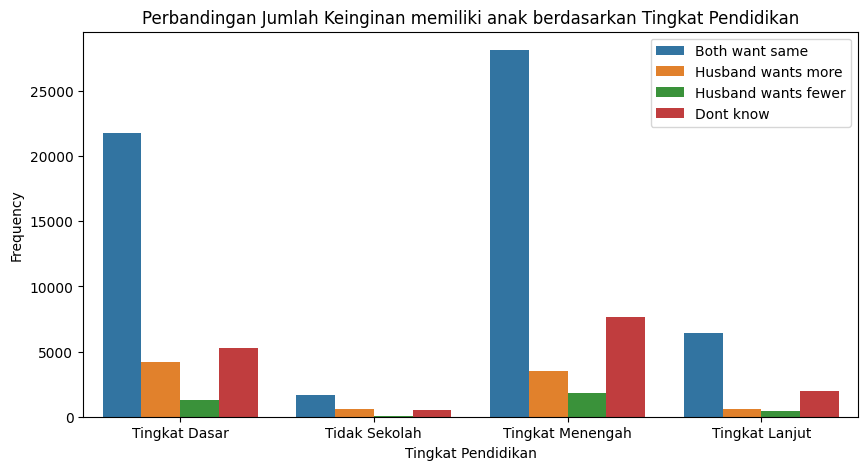

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
new_category_names = ['Tingkat Dasar', 'Tidak Sekolah', 'Tingkat Menengah', 'Tingkat Lanjut']  # Replace these with your desired names

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='v6', data=Data_mining, hue='v9')
ax.set_xticklabels(new_category_names)  # Set the x-axis labels
plt.title('Perbandingan Jumlah Keinginan memiliki anak berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.legend(["Both want same", "Husband wants more", "Husband wants fewer", "Dont know"])
plt.ylabel('Frequency')
plt.show()


In [57]:
v6_counts = Both_same['v6'].value_counts()


v6_counts.plot(kind='bar')


plt.xlabel('v6')
plt.ylabel('Count')
plt.title('v6 = Both')


plt.show()

NameError: ignored

In [58]:
Both_same = Data_mining.query('v9 == 1')
Data_mining.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,1,2,1,11,39,1,5,1,1,1997.0,19.0
1,2,2,1,11,39,1,5,1,1,1997.0,19.0
2,3,2,1,11,39,1,5,1,1,1997.0,19.0
3,4,2,1,11,39,1,5,1,1,1997.0,19.0
4,5,2,1,11,39,1,5,1,1,1997.0,19.0


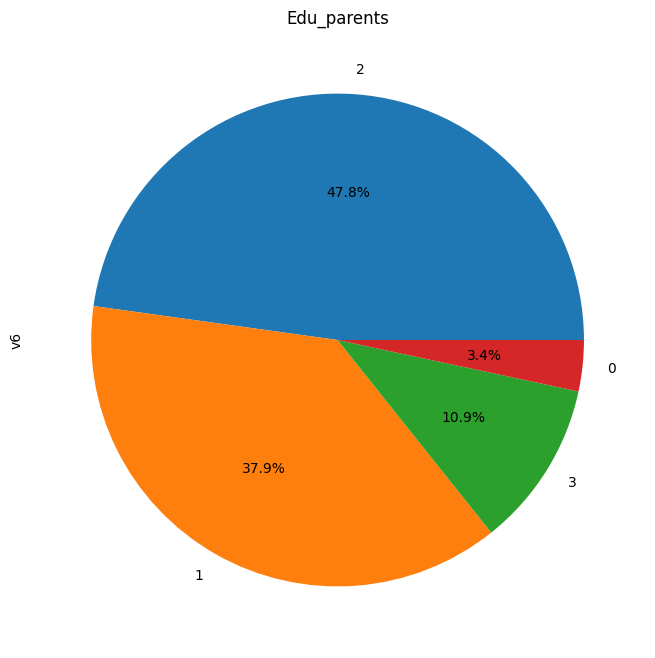

In [59]:
Edu_parents= Data_mining['v6'].value_counts()
Both_same = Edu_parents.plot.pie(autopct='%1.1f%%', shadow=False, figsize=(10, 8))
plt.title('Edu_parents')
plt.show()

In [60]:
# menampilkan distribusi frekuensi dari veriabel kategoricak

for var in categorical:

    print(Data_mining[var].value_counts()/np.float(len(Data_mining)))

1     0.396584
2     0.296100
3     0.161512
4     0.076713
5     0.035442
6     0.017244
7     0.008692
8     0.004410
9     0.001873
10    0.000838
11    0.000396
12    0.000163
13    0.000035
Name: v1, dtype: float64
2     0.041818
3     0.041667
4     0.041562
5     0.041504
13    0.041387
6     0.041353
12    0.040945
9     0.040654
11    0.040619
7     0.040538
8     0.040491
10    0.040468
17    0.040247
15    0.040073
19    0.039898
14    0.039863
18    0.039828
1     0.039328
23    0.039118
20    0.039072
16    0.039037
24    0.038199
21    0.038164
22    0.037955
25    0.035954
26    0.000209
27    0.000035
28    0.000012
Name: v2, dtype: float64
1334    0.001420
1810    0.001385
1867    0.001257
1929    0.001233
1883    0.001222
          ...   
934     0.000140
1922    0.000140
1311    0.000128
1108    0.000105
1880    0.000070
Name: v3, Length: 1970, dtype: float64
32    0.095074
35    0.065124
33    0.060714
12    0.054489
53    0.053744
11    0.050894
81    0.042609
76  

#**Eksplorasi Data Numerik**

In [61]:
#mengidentifikasi tipe data veriabel

numerical = [var for var in Data_mining.columns if Data_mining[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 3 numerical variables

The numerical variables are :

 ['v5', 'v10', 'v11']


In [62]:
Data_mining[numerical].isnull().sum()

v5      0
v10    55
v11    55
dtype: int64

**Menangani Data Hilang**

<Axes: >

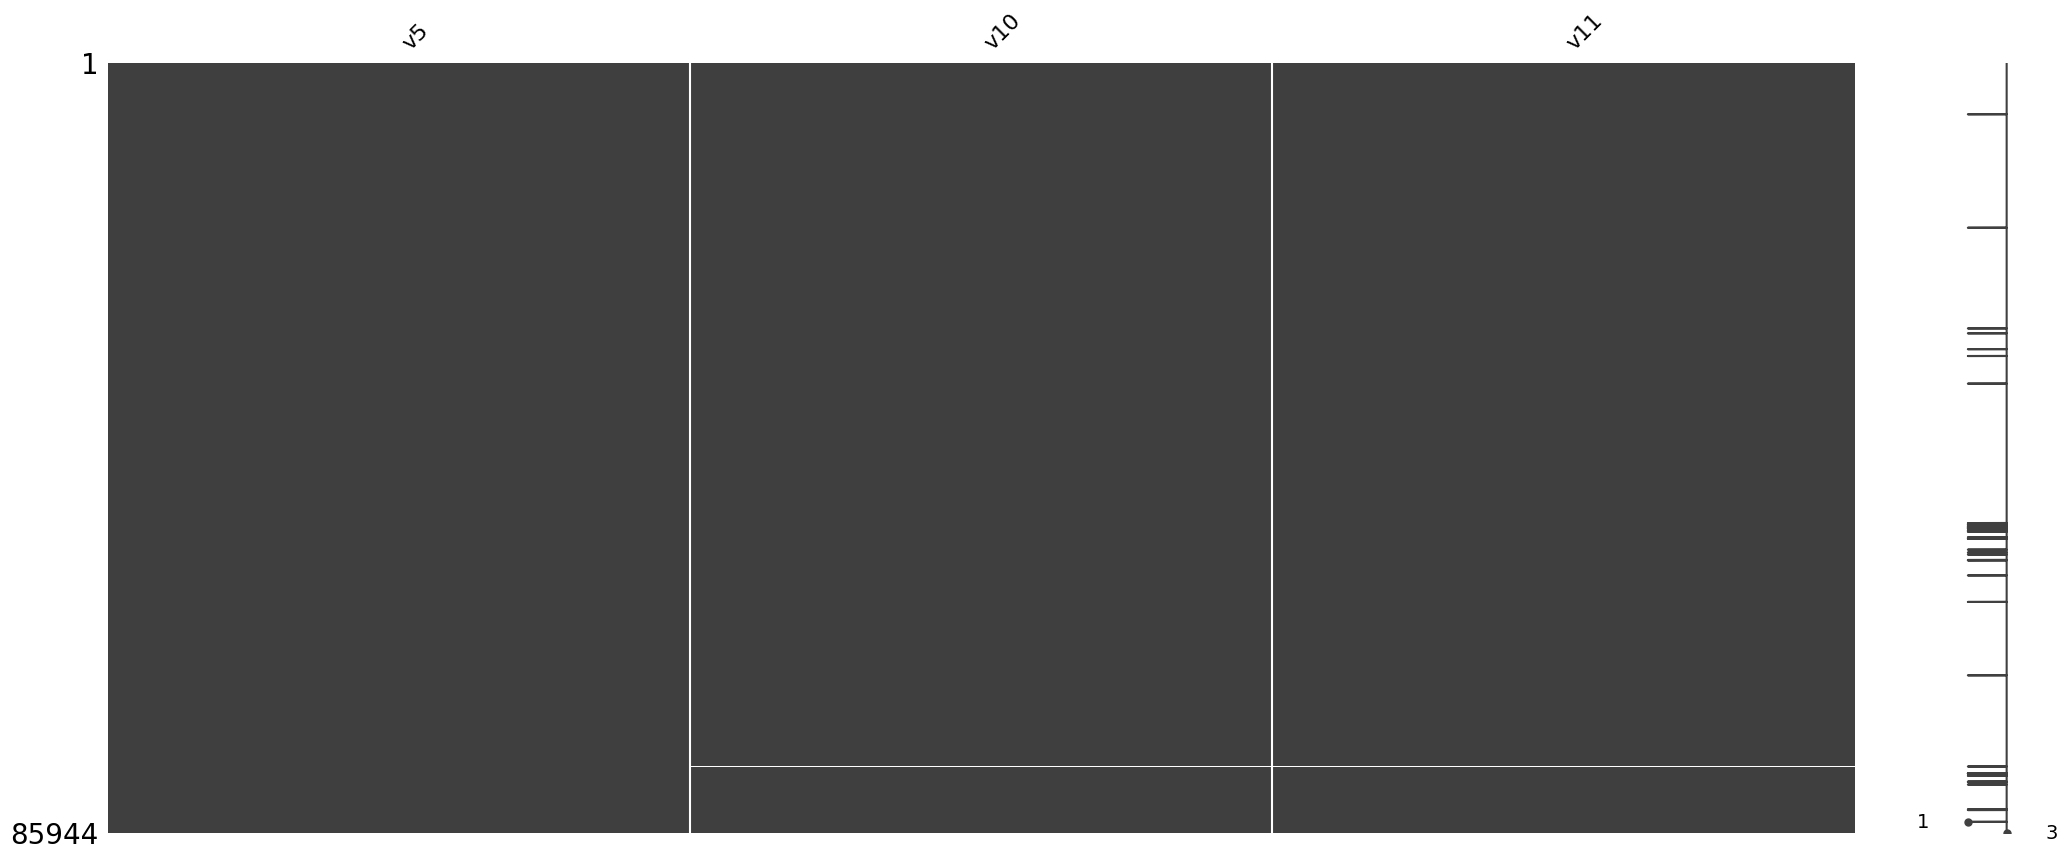

In [63]:
import missingno as msno
msno.matrix(Data_mining[numerical])

In [64]:
Data_mining['v10'].mean()

1998.7231775896796

In [65]:
Data_mining['v11'].mean()

19.635052218561167

In [66]:
#imputasi data dengan mean
Data_mining['v10']=Data_mining['v10'].fillna('1998.722')


In [67]:
#imputasi data dengan mean
Data_mining['v11'] = Data_mining['v11'].fillna('19.634')

In [68]:
Data_mining['v10'] = pd.to_numeric(Data_mining['v10'], errors='coerce')

In [69]:
Data_mining['v11'] = pd.to_numeric(Data_mining['v11'], errors='coerce')

In [70]:
Data_mining[numerical].isnull().sum()

v5     0
v10    0
v11    0
dtype: int64

In [71]:
Data_mining.isnull().sum()

v1     0
v2     0
v3     0
v4     0
v5     0
v6     0
v7     0
v8     0
v9     0
v10    0
v11    0
dtype: int64

v5        Axes(0.125,0.11;0.227941x0.77)
v10    Axes(0.398529,0.11;0.227941x0.77)
v11    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

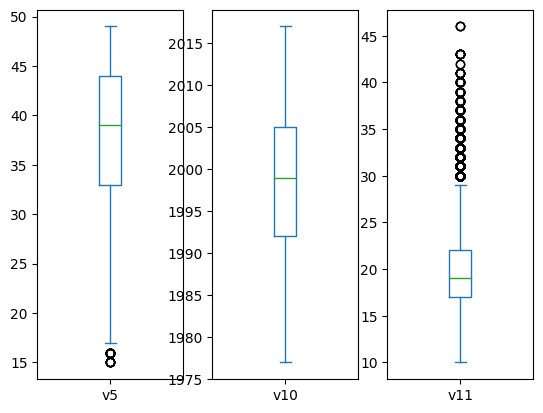

In [72]:
Data_mining.plot(kind="box", subplots= True)

#**menentukan x dan y**

In [73]:
Dataminning = Data_mining.drop(columns=['v3'])


In [74]:
print(Dataminning)

      v1  v2  v4  v5 v6 v7 v8 v9     v10   v11
0      1   2  11  39  1  5  1  1  1997.0  19.0
1      2   2  11  39  1  5  1  1  1997.0  19.0
2      3   2  11  39  1  5  1  1  1997.0  19.0
3      4   2  11  39  1  5  1  1  1997.0  19.0
4      5   2  11  39  1  5  1  1  1997.0  19.0
...   ..  ..  ..  .. .. .. .. ..     ...   ...
86260  1  23  94  44  2  2  0  1  1992.0  19.0
86261  2  23  94  44  2  2  0  1  1992.0  19.0
86262  1  24  94  22  2  0  1  1  2013.0  18.0
86263  1  25  94  25  2  1  1  1  2007.0  15.0
86264  2  25  94  25  2  1  1  1  2007.0  15.0

[85944 rows x 10 columns]


In [75]:
X = Dataminning.drop(['v9'], axis=1)

y = Dataminning['v9']

**Split data into separate training and test set**

In [76]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)


In [77]:
X_train.shape, X_test.shape

((60160, 9), (25784, 9))

**Feature Engineering**

In [78]:
X_train.dtypes

v1      object
v2      object
v4      object
v5       int64
v6      object
v7      object
v8      object
v10    float64
v11    float64
dtype: object

In [79]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['v1', 'v2', 'v4', 'v6', 'v7', 'v8']

In [80]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['v5', 'v10', 'v11']

In [81]:
X_train[categorical].head()

,v1,v2,v4,v6,v7,v8
38521,2,11,33,1,2,0
13306,1,2,15,1,2,1
24004,2,5,31,1,1,1
28774,1,4,32,2,0,1
47220,1,12,36,2,0,1


In [82]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 881.2 kB/s eta 0:00:00


**Feature Scaling**

In [83]:
cols = X_train.columns

In [84]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [85]:
X_train = pd.DataFrame(X_train, columns=[cols])
print(X_train)

        v1        v2    v4        v5   v6   v7   v8       v10  v11
0      0.0 -0.166667 -0.04 -0.181818 -1.0  0.5 -0.5  0.384615  1.0
1     -0.5 -0.916667 -0.40 -0.090909 -1.0  0.5  0.0  0.923077  2.6
2      0.0 -0.666667 -0.08 -1.181818 -1.0  0.0  0.0  0.615385 -0.4
3     -0.5 -0.750000 -0.06 -0.363636  0.0 -0.5  0.0  0.538462  1.0
4     -0.5 -0.083333  0.02 -0.090909  0.0 -0.5  0.0  0.076923  0.2
...    ...       ...   ...       ...  ...  ...  ...       ...  ...
60155  0.0  1.000000  0.34 -0.545455  0.0 -0.5  0.5  0.153846 -0.4
60156 -0.5  0.500000  0.36 -0.363636  1.0  0.0  0.0  0.692308  1.4
60157  0.0  0.250000  0.58 -0.272727 -1.0  1.5  0.0 -0.230769 -0.8
60158 -0.5  0.166667 -0.48 -0.727273  0.0  0.5 -0.5  0.461538 -0.2
60159 -0.5  0.166667 -0.04  0.090909 -1.0  0.0 -0.5  0.461538  1.8

[60160 rows x 9 columns]


In [86]:
X_test = pd.DataFrame(X_test, columns=[cols])
print(X_test)

        v1        v2    v4        v5   v6   v7   v8       v10  v11
0      0.0 -0.416667  0.54 -0.181818 -1.0  1.0 -0.5 -0.384615 -1.2
1     -0.5  1.000000  0.56 -0.909091 -1.0 -0.5  0.5  0.769231  0.2
2      0.5  0.333333 -0.06  0.000000 -1.0  0.0  0.5 -0.769231 -1.8
3     -0.5 -0.250000 -0.06 -1.181818  0.0 -0.5  0.0  1.076923  0.6
4      0.5  0.333333  0.56  0.181818  0.0 -0.5  1.0  0.230769  1.4
...    ...       ...   ...       ...  ...  ...  ...       ...  ...
25779  0.0  0.666667 -0.06  0.363636  1.0  0.5  0.0 -0.230769  0.4
25780  0.0  0.666667  0.36 -1.181818  0.0  0.0 -0.5  0.769231 -0.2
25781  2.0 -0.250000 -0.46  0.454545 -2.0 -0.5  1.5 -0.538462  0.0
25782  0.0 -0.250000  0.00  0.909091  1.0 -0.5  0.5 -0.538462  1.0
25783  0.5 -0.333333  0.00  0.818182  0.0  0.0  0.5 -0.461538  1.0

[25784 rows x 9 columns]


**Model training**

In [87]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
GridSearchCV(estimator=GaussianNB(), refit= True, verbose= 2, cv=10, n_jobs=-1, param_grid=param_grid_nb)
grid_gnb= GridSearchCV(estimator=GaussianNB(), param_grid= param_grid_nb, refit= True, verbose= 2, cv=10, n_jobs=-1)

In [89]:
# fit the model
grid_gnb.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=2)

In [90]:
grid_gnb.best_estimator_

GaussianNB(var_smoothing=1.0)

**Predict the results**

In [91]:
y_pred = grid_gnb.predict(X_test)



**Check accuracy score**

In [92]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6651


Membandingkan Train dan Test Akurasi

In [93]:
y_pred_train = grid_gnb.predict(X_train)

y_pred_train

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [94]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6783


### Check for overfitting and underfitting

In [96]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid_gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_gnb.score(X_test, y_test)))

Training set score: 0.6783
Test set score: 0.6651


### Compare model accuracy with null accuracy


So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.


In [97]:
# check class distribution in test set

y_test.value_counts()

1    17160
2     4781
8     2763
3     1080
Name: v9, dtype: int64

In [98]:
# check null accuracy score

null_accuracy = (17451/(17451+4530+2745+1058))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6768


We can see that our model accuracy score is 0.8083 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

**Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [101]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[17143     0     0    17]
 [ 4774     0     0     7]
 [ 1079     0     0     1]
 [ 2758     0     0     5]]


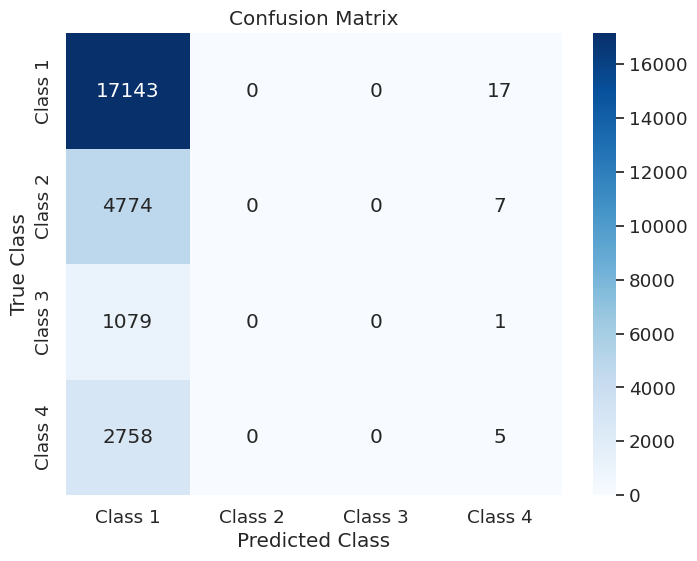

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your confusion matrix
conf_matrix = np.array([[17143, 0, 0, 17],
                       [4774, 0, 0, 7],
                       [1079, 0, 0, 1],
                       [2758, 0, 0, 5]])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"],
            yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


In [103]:
# Extract values from the confusion matrix
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate accuracy, precision, and error for each class
accuracy = (TP + TN) / np.sum(conf_matrix)
precision = TP / (TP + FP)
error = (FP + FN) / np.sum(conf_matrix)

# Print the results
for i in range(len(accuracy)):
    print(f"Class {i + 1}:")
    print(f"Accuracy: {accuracy[i]:.4f}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Error: {error[i]:.4f}")
    print()


Class 1:
Accuracy: 0.6654
Precision: 0.6656
Error: 0.3346

Class 2:
Accuracy: 0.8146
Precision: nan
Error: 0.1854

Class 3:
Accuracy: 0.9581
Precision: nan
Error: 0.0419

Class 4:
Accuracy: 0.8921
Precision: 0.1667
Error: 0.1079

